In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

The columns such as passenger id , ticket and name, consists no important data,
such as, passenger id contains only numbers 1 to 891,and ticket contains of just so many random numbers, and name 
contains objects,therefore we can drop these columns as we don't need them

In [4]:
df.drop(columns = ['Ticket','Name'],inplace = True)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Now we will see if there is any missing data, and we will fill it with a worthy technique


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We understand the data better if we see explanation through visualization 

<Axes: >

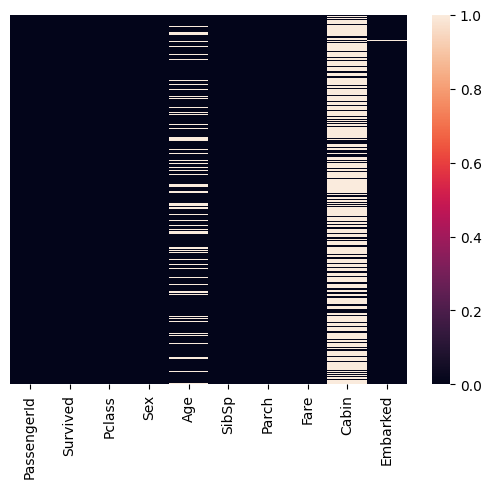

In [7]:
sns.heatmap(df.isnull(),yticklabels = False)

In [8]:
df['Cabin'].isnull().sum()

687

In [9]:
round(df['Cabin'].isnull().sum()/df.shape[0]*100,2)

77.1

Any column which contains of more than 50% - 60% of the missing data, we should not use it as it will not be helpful for training the model,
so we will remove the cabin column from our dataset

In [10]:
df.drop(columns ='Cabin',inplace = True)

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
mean = round(df['Age'].mean(),2)
median = round(df['Age'].median(),2)
mean,median

(29.7, 28.0)

In [13]:
df.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Here we can see that different age groups contains of different average and median,
therefore we can fill the blank age data with a suitable average or median of a particular age group

In [14]:
# pclass1 = df.groupby('Pclass')['Age'].get_group(1)

In [15]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [17]:
df['Embarked'].isnull().sum()

2

If the column contains categorical data, the most effective way to fill its na values 
is to use mode as it will tell you the most frequent category in that column 

In [18]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Now we will check if the dataset contains any duplicate row and drop the duplicated data.
The data is said to be duplicate if the data of all the fatures of one row is similar to another.

In [19]:
df.duplicated().sum()

0

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.duplicated().sum()

0

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


We can observe from the below graph that the number of people who survived is more than the people who did not survived.

<Axes: xlabel='Survived', ylabel='count'>

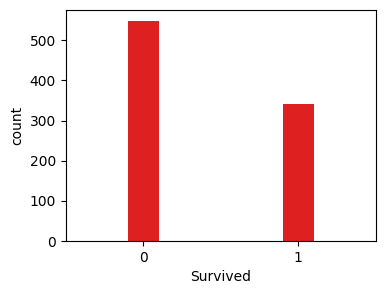

In [23]:
plt.figure(figsize = (4,3))
sns.countplot(data = df, x = 'Survived',width = 0.2,color = 'red')

Here I have made a graph comparing Male and Female survival rate.
Generally Men helps in rescuing children and womens so that they can survive.
And because of that they were not able to rescue themselves.
thats why the survival rate of Men is lower than the Womens

<Axes: xlabel='Survived', ylabel='count'>

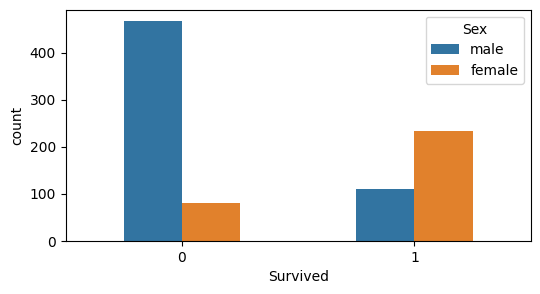

In [24]:
plt.figure(figsize = (6,3))
sns.countplot(data = df,x = 'Survived',hue = 'Sex',width = 0.5)

<Axes: xlabel='Survived', ylabel='count'>

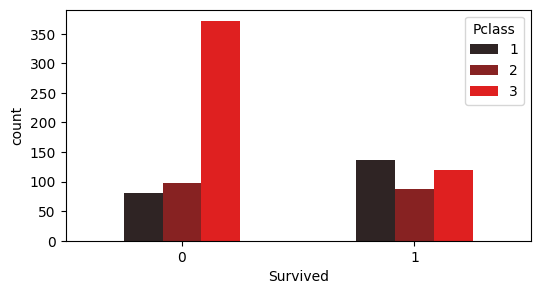

In [25]:
plt.figure(figsize = (6,3))
sns.countplot(data = df, x = 'Survived',hue = 'Pclass',width = 0.5,palette = 'dark:red')

<Axes: xlabel='Survived', ylabel='count'>

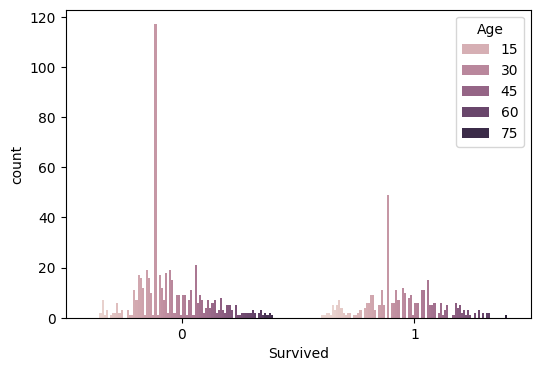

In [26]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'Survived', hue = df['Age'])

In [27]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Fare'>

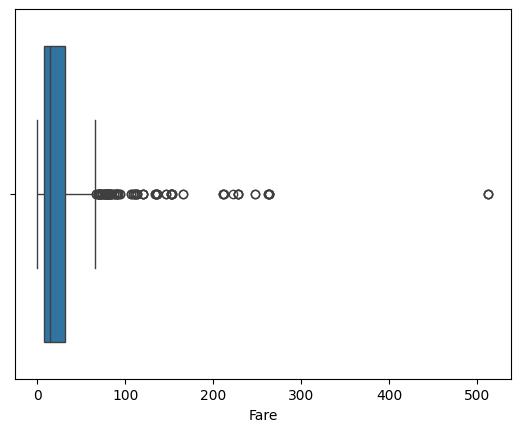

In [28]:
sns.boxplot(x = df['Fare'])

In [29]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr

(7.9104, 31.0, 23.0896)

In [30]:
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
lower_bound,upper_bound

(-26.724, 65.6344)

In [31]:
df = df[(df['Fare']<=upper_bound) & (df['Fare']>=lower_bound)]

<Axes: xlabel='Fare'>

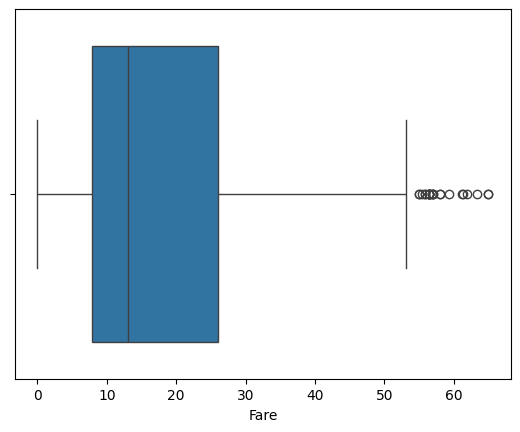

In [32]:
sns.boxplot(x = df['Fare'])

<Axes: xlabel='Age'>

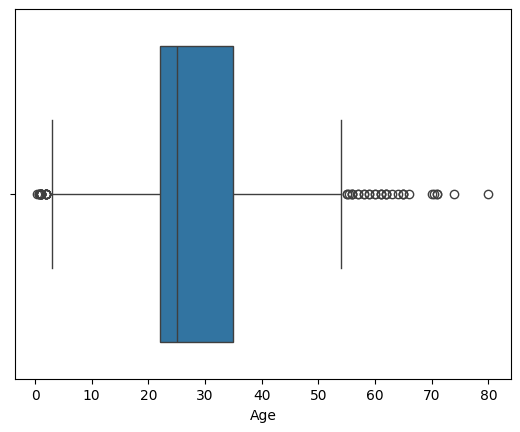

In [33]:
sns.boxplot(x = df['Age'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Sex          775 non-null    object 
 4   Age          775 non-null    float64
 5   SibSp        775 non-null    int64  
 6   Parch        775 non-null    int64  
 7   Fare         775 non-null    float64
 8   Embarked     775 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 60.5+ KB


In [35]:
df['Sex'].value_counts()

Sex
male      531
female    244
Name: count, dtype: int64

In [36]:
df['Embarked'].value_counts()

Embarked
S    584
C    116
Q     75
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [39]:
df['Embarked'].value_counts()

Embarked
2    584
0    116
1     75
Name: count, dtype: int64

In [40]:
df['Sex'].value_counts()

Sex
1    531
0    244
Name: count, dtype: int64

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mms = MinMaxScaler()
df['Fare'] = mms.fit_transform(df[['Fare']])

In [43]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,0.111538,2
2,3,1,3,0,26.0,0,0,0.121923,2


In [44]:
x = df.drop(columns = ['Survived','PassengerId'])
y = df['Survived']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [49]:
lr.score(X_test,y_test)*100

83.22580645161291

In [50]:
y_pred = lr.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [52]:
accuracy_score(y_test,y_pred)*100

83.22580645161291

In [53]:
precision_score(y_test,y_pred)*100

85.71428571428571

In [54]:
f1_score(y_test,y_pred)*100

73.46938775510205

In [55]:
recall_score(y_test,y_pred)*100

64.28571428571429

In [56]:
y_pred = pd.DataFrame(y_pred)

In [57]:
y_pred.columns = ['Survived']

In [58]:
X_test["PassengerId"] = df["PassengerId"]

In [59]:
X_test.to_csv('Test.csv',index = False)

In [60]:
test_df = pd.read_csv('Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       155 non-null    int64  
 1   Sex          155 non-null    int64  
 2   Age          155 non-null    float64
 3   SibSp        155 non-null    int64  
 4   Parch        155 non-null    int64  
 5   Fare         155 non-null    float64
 6   Embarked     155 non-null    int64  
 7   PassengerId  155 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 9.8 KB


In [61]:
y_pred = y_pred.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

submission  = pd.DataFrame({
    'PassengerId': X_test['PassengerId'],
    'Survived' : y_pred['Survived']
})

In [62]:
submission

,PassengerId,Survived
0,616,1
1,266,0
2,47,0
3,789,0
4,632,0
...,...,...
150,93,0
151,322,0
152,546,0
153,750,0


In [63]:
submission.to_csv('Submission.csv',index = False)

In [64]:
sub = pd.read_csv('Submission.csv')
sub.head(2)

,PassengerId,Survived
0,616,1
1,266,0


In [65]:
sub.shape

(155, 2)